<a href="https://colab.research.google.com/github/MALLI7622/Deep-Learning-with-PyTorch/blob/master/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision

In [81]:
transform_train = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([ 
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [82]:
trainset = torchvision.datasets.CIFAR10( root = './cifar10', train = True, 
                                       download = True, transform = transform_train)

testset = torchvision.datasets.CIFAR10( root = './cifar10', train = False, 
                                       download = True, transform = transform_train)

Files already downloaded and verified
Files already downloaded and verified


In [83]:
batch_size = 16

In [84]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [85]:
dataset = iter(trainloader)
print(dataset)
images, labels = dataset.next()

print(images.shape)
print(images[1].shape)
print(labels[0])

torch.Size([16, 3, 32, 32])
torch.Size([3, 32, 32])
tensor(1)


In [86]:
def visualize_data(data):

    for i, data in enumerate(data, 0):
        k = np.random.randint(16)
        images, labels = data
        images = images.numpy()
        image = np.transpose(images[k], (1, 2, 0))
        noise = np.random.normal(loc = 0.52, scale= 0.12, size = images.shape)
        noise_images = images + noise
        torch_noise_images = torch.from_numpy(noise_images)
        npimg = torch_noise_images[k].numpy()
        npimg = np.transpose(npimg, (1, 2, 0))
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
        ax1.imshow(image)
        ax2.imshow(npimg)

        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


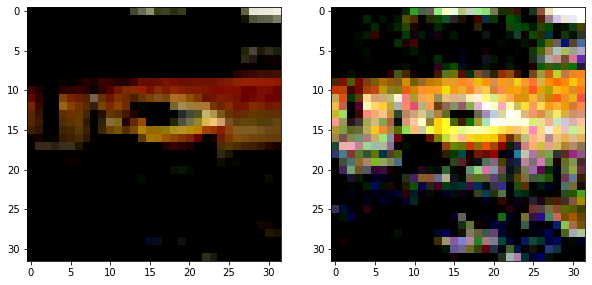

In [87]:
visualize_data(trainloader)

In [88]:

class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [89]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [98]:
epochs = 1
net = Network().to(device)
loss_fn = nn.MSELoss()
opt = optim.Adam(net.parameters(), lr = 0.01)

In [103]:
%%time

loss_on_epochs = []
for epoch in tqdm(range(epochs)):
    for data in trainloader:
        images, _ = data

        images_copy = images.numpy()
        noise = np.random.normal(loc = 0.52, scale= 0.12, size = images_copy.shape)
        noise_images = images_copy + noise
        torch_noise_images = torch.from_numpy(noise_images)
        images = images.to(device)

        torch_noise_images = torch_noise_images.to(device)
       
        output = net(torch_noise_images.float())
        
        loss = loss_fn(output, images)
        opt.zero_grad()
        loss.backward()
        opt.step()
    loss_on_epochs.append(loss.item())
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, epochs, loss.item()))






  0%|          | 0/1 [00:00<?, ?it/s]



 24%|██▎       | 735/3125 [00:47<01:32, 25.90it/s]




100%|██████████| 1/1 [01:50<00:00, 110.56s/it]

epoch [1/1], loss:0.1644
CPU times: user 1min 49s, sys: 1.12 s, total: 1min 50s
Wall time: 1min 50s


[0.1644495278596878]


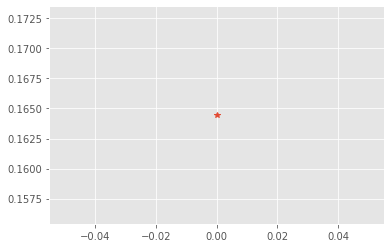

In [106]:
print(loss_on_epochs)
plt.style.use('ggplot')
plt.plot(loss_on_epochs, '*')

In [107]:
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

In [108]:
data = iter(testloader)
img, _ = data.next()
print(img.shape)
print(img[1].shape)

torch.Size([16, 3, 32, 32])
torch.Size([3, 32, 32])


In [110]:
datatest = iter(testloader)

images, _ = datatest.next()

images_copy = images.numpy().copy()
noise = np.random.normal( loc = 0.52, scale = 0.12, size= images_copy.shape)


noisy_images = images_copy + noise

torch_noisy_images = torch.from_numpy(noisy_images).to(device)

predictions = net(torch_noisy_images.float())
print(predictions.shape)


torch.Size([16, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 32, 32, 3])
torch.Size([16, 32, 32, 3])
torch.Size([16, 32, 32, 3])


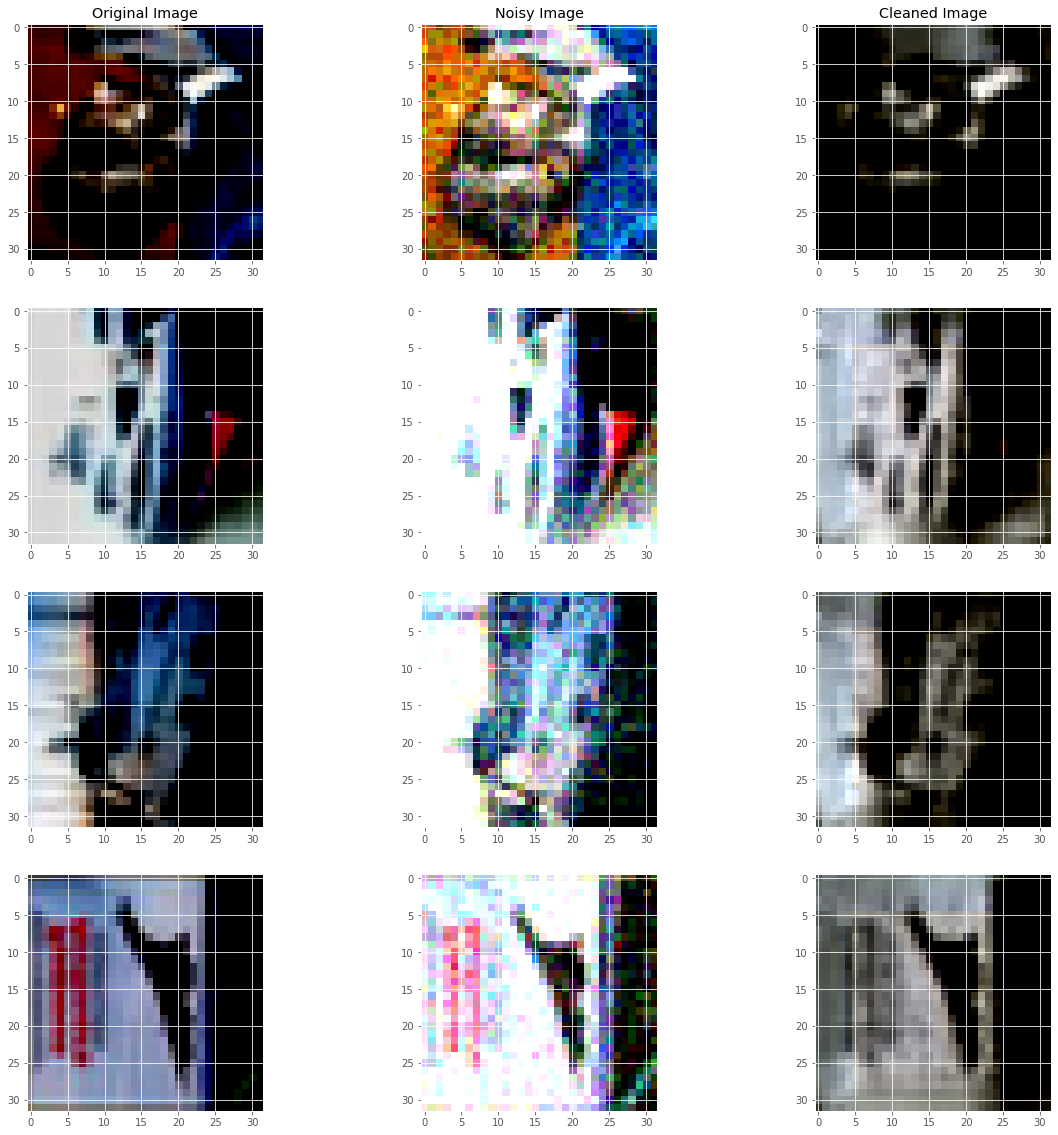

In [111]:

fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax[0, 0].set_title("Original Image")
ax[0, 1].set_title("Noisy Image")
ax[0, 2].set_title("Cleaned Image")

images = images.permute(0, 3, 2, 1)
print(images.shape)
torch_noisy_images = torch_noisy_images.permute(0, 3, 2, 1)
print(torch_noisy_images.shape)
predictions = predictions.permute(0, 3, 2, 1)
print(predictions.shape)

for i in range(4):

  ax[i, 0].imshow(images[i].cpu().detach().numpy())
  ax[i, 1].imshow(torch_noisy_images[i].cpu().detach().numpy())
  ax[i, 2].imshow(predictions[i].cpu().detach().numpy()) 
